# Titanic: Análise exploratória


Com certeza, a maioria de vocês conhece a história por trás do naufrágio deste que seria o navio mais moderno do mundo para a época. 

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Apesar da tecnologia disponível, colidiu com um iceberg em 15 de abril de 1912. **seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.**

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros. 

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? 

Resumidamente o objetivo desta análise é a demontração dos números obtidos através de gráficos!

---
# 1. Baixando o dataset do titanic, disponível em: <br>
- https://www.kaggle.com/datasets/yasserh/titanic-dataset

---
# 2. Passos da Análise Exploratoria:

Vamos realizar uma análise exploratória dos dados visando identificar padrões e características importantes que possa nos contar uma história sobre o naufrágio.
- Resumo estatístico das colunas numéricas
- Verificar valores ausentes
- Distribuição das variáveis categóricas
- Análise de sobrevivência por diferentes características (genero, classe, idade.)
- Correlação entre variáveis


In [20]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
%matplotlib inline

In [21]:
file_path = 'Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)
titanic_df.columns = ["IDpassageiro","Sobrevivente","ClassePassagem","Nome","Genero","Idade","NrIrmaosConjuges",\
                "NrPaisFilhos","NrTicket","Tarifa","Cabine","PortoEmbarque"]
titanic_df.head(10)

,IDpassageiro,Sobrevivente,ClassePassagem,Nome,Genero,Idade,NrIrmaosConjuges,NrPaisFilhos,NrTicket,Tarifa,Cabine,PortoEmbarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# verificando as dimensões do DataFrame (quantas colunas e quantas linhas)
print("Variáveis:\t{}\nEntradas:\t{}".format(titanic_df.shape[1], titanic_df.shape[0]))

Variáveis:	12
Entradas:	891


# 3. Exploração dos dados

O objetivo é estudar cada variável e verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.
Como objeto principal daremos ênfase na variável Sobreviventes.

### 3.1 Dicionário de Dados

* **IDpassageiro:** Número de identificação do passageiro
* **Sobrevivente:** Informa se o passageiro sobreviveu ao desastre (0 = Não 1 = Sim)
* **ClassePassagem:** Classe do bilhete (1ª Classe - 2ª Classe - 3ª Classe)
* **Nome:** Nome do passageiro
* **Genero:** Sexo do passageiro
* **Idade:** Idade do passageiro
* **NrIrmaosConjuges:** Quantidade de cônjuges e irmãos a bordo
* **NrPaisFilhos:** Quantidade de pais e filhos a bordo
* **NrTicket:** Número da passagem
* **Tarifa:** Preço da Passagem
* **Cabine:** Número da cabine do passageiro
* **PortoEmbarque:** Porto no qual o passageiro embarcou  (C = Cherbourg - Q = Queenstown - S = Southampton)

### 3.2 Tipos de cada variável?

* Variáveis Numéricas
    * Discretas
        * ClassePassagem
        * NrIrmaosConjuges
        * NrPaisFilhos
    * Contínuas
        * Idade
        * Tarifa
    * Alvo
        * Sobrevivente
    * Chave Primária
        * IDpassageiro
* Variáveis Categóricas
    * Nome
    * Genero
    * NrTicket
    * Cabine
    * PortoEmbarque

In [23]:
# identificar o tipo de cada variável
display(titanic_df.dtypes)

IDpassageiro          int64
Sobrevivente          int64
ClassePassagem        int64
Nome                 object
Genero               object
Idade               float64
NrIrmaosConjuges      int64
NrPaisFilhos          int64
NrTicket             object
Tarifa              float64
Cabine               object
PortoEmbarque        object
dtype: object

### 3.3 Qual a porcentagem de valores faltantes?


- A **Cabine** é a que possui o maior número de informações faltantes, com mais de 77%. 
- A coluna **Idade** não possui valor em quase 20% dos passageiros. 
- A coluna **PortoEmbarque** possui apenas 0,2% de informações faltantes.

In [24]:
# ver a porcentagem valores faltantes
(titanic_df.isnull().sum() / titanic_df.shape[0]).sort_values(ascending=False)

Cabine              0.771044
Idade               0.198653
PortoEmbarque       0.002245
IDpassageiro        0.000000
Sobrevivente        0.000000
ClassePassagem      0.000000
Nome                0.000000
Genero              0.000000
NrIrmaosConjuges    0.000000
NrPaisFilhos        0.000000
NrTicket            0.000000
Tarifa              0.000000
dtype: float64

### 3.4 Visualizando os outliers

- Os outliers são importantes, pois podem indicar variações significativas nos dados, como passageiros muito mais velhos ou muito mais jovens do que a maioria.

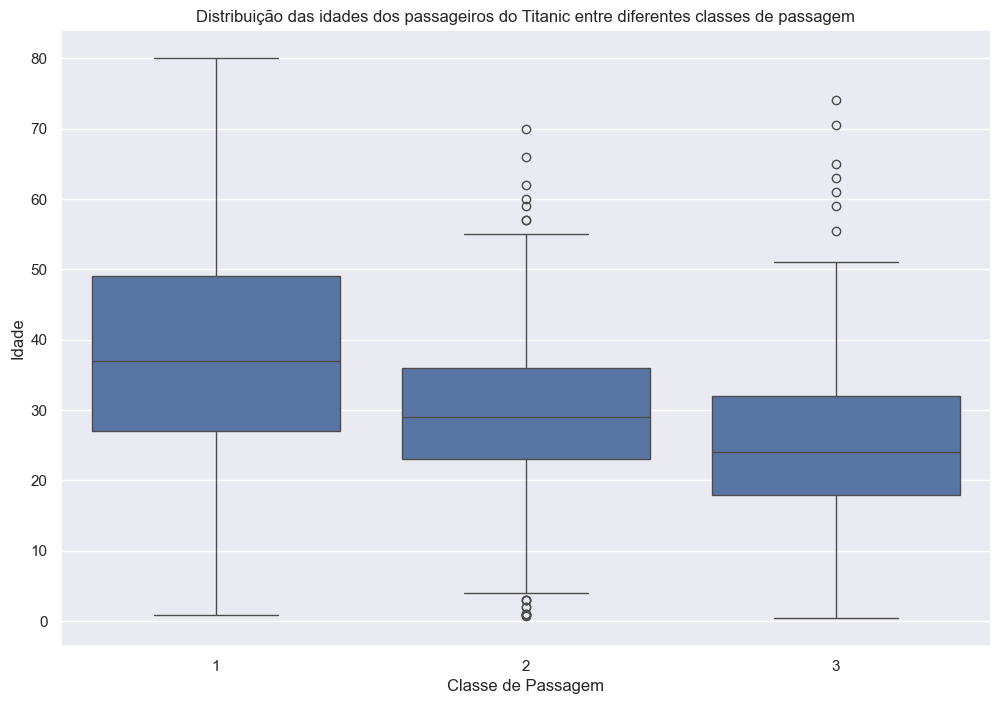

In [25]:
# Compara a distribuição das idades dos passageiros do Titanic entre diferentes classes de passagem

# Configurando o tamanho da figura
sns.set(rc={'figure.figsize':(12,8)})

# Plotando o boxplot sem a paleta de cores definida para evitar o aviso
sns.boxplot(x='ClassePassagem', y='Idade', data=titanic_df)

# Configurando os títulos e labels
plt.title('Distribuição das idades dos passageiros do Titanic entre diferentes classes de passagem')
plt.xlabel('Classe de Passagem')
plt.ylabel('Idade')

# Exibindo o gráfico
plt.show()

### 3.5 Como é a distribuição estatística dos dados?

In [26]:
titanic_df.describe()

,IDpassageiro,Sobrevivente,ClassePassagem,Idade,NrIrmaosConjuges,NrPaisFilhos,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


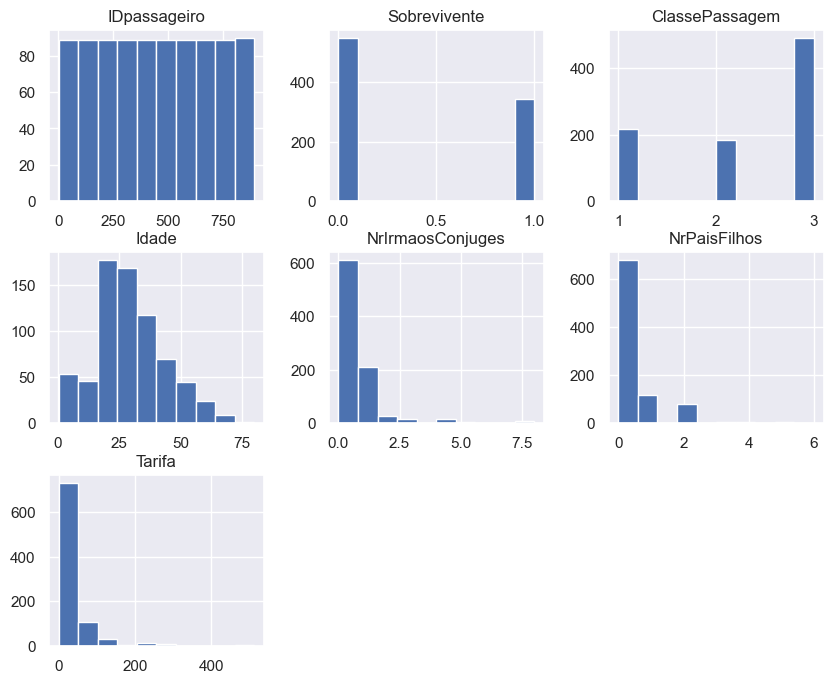

In [27]:
# ver histograma das variáveis numéricas
titanic_df.hist(figsize=(10,8));

### 3.6 Quais grupos de pessoas tinham mais chances de sobrevivência?

In [28]:
# Analisar a probabilidade de sobrevivência pelo Sexo
titanic_df[['Genero', 'Sobrevivente']].groupby(['Genero']).mean()

,Sobrevivente
Genero,
female,0.742038
male,0.188908


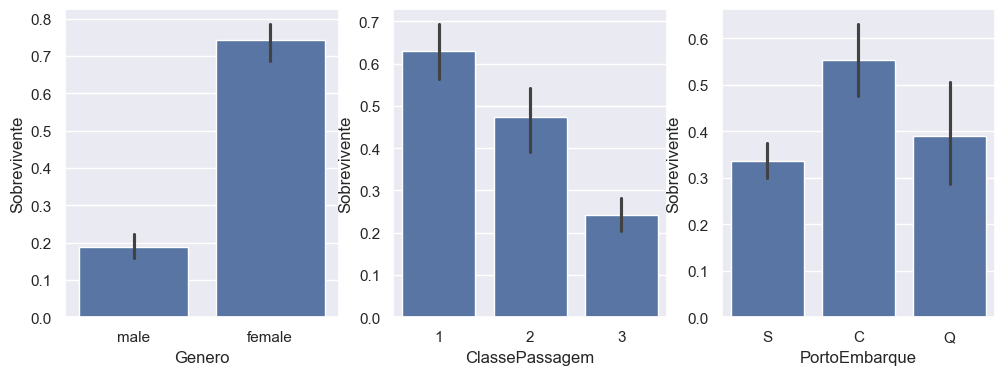

In [29]:
# Plotar os gráficos para Sobrevivente vs. Genero, ClassePassagem e PortoEmbarque
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Genero', y='Sobrevivente', data=titanic_df, ax=axis1)
sns.barplot(x='ClassePassagem', y='Sobrevivente', data=titanic_df, ax=axis2)
sns.barplot(x='PortoEmbarque', y='Sobrevivente', data=titanic_df, ax=axis3);

<Figure size 1200x400 with 0 Axes>

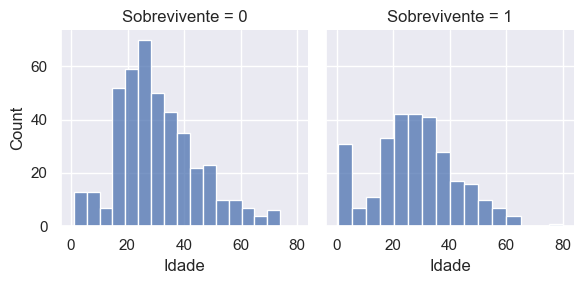

In [30]:
# Compara Idade com a probabilidade de sobrevivência
plt.figure(figsize=(12, 4))
age_survived = sns.FacetGrid(titanic_df, col='Sobrevivente')
age_survived.map(sns.histplot, 'Idade')

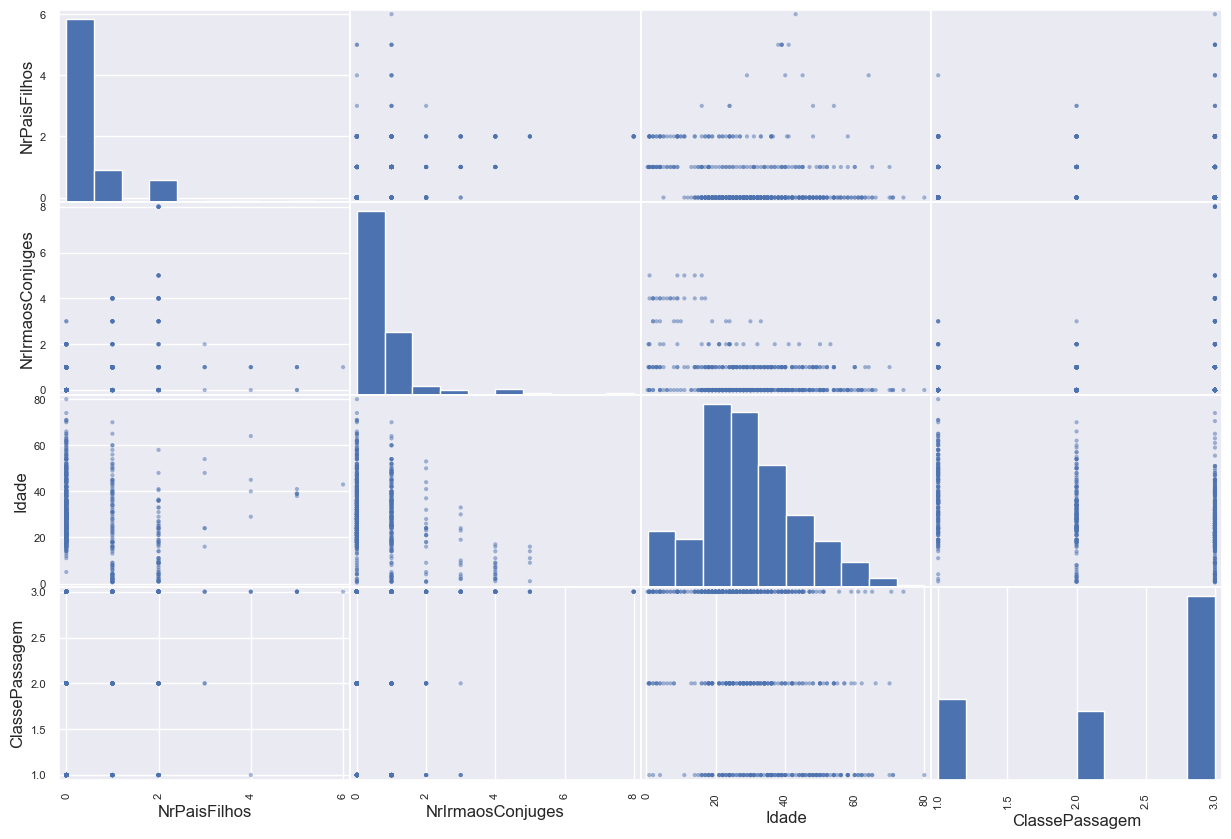

In [31]:
# O objetivo deste código é criar uma scatter matrix (matriz de dispersão) 
# para visualizar as relações entre várias colunas numéricas do DataFrame

# plotar uma scatter matrix
columns=['NrPaisFilhos', 'NrIrmaosConjuges', 'Idade', 'ClassePassagem']
pd.plotting.scatter_matrix(titanic_df[columns], figsize=(15, 10));

### 3.7 Criando um Heatmap de correlações entre as variáveis

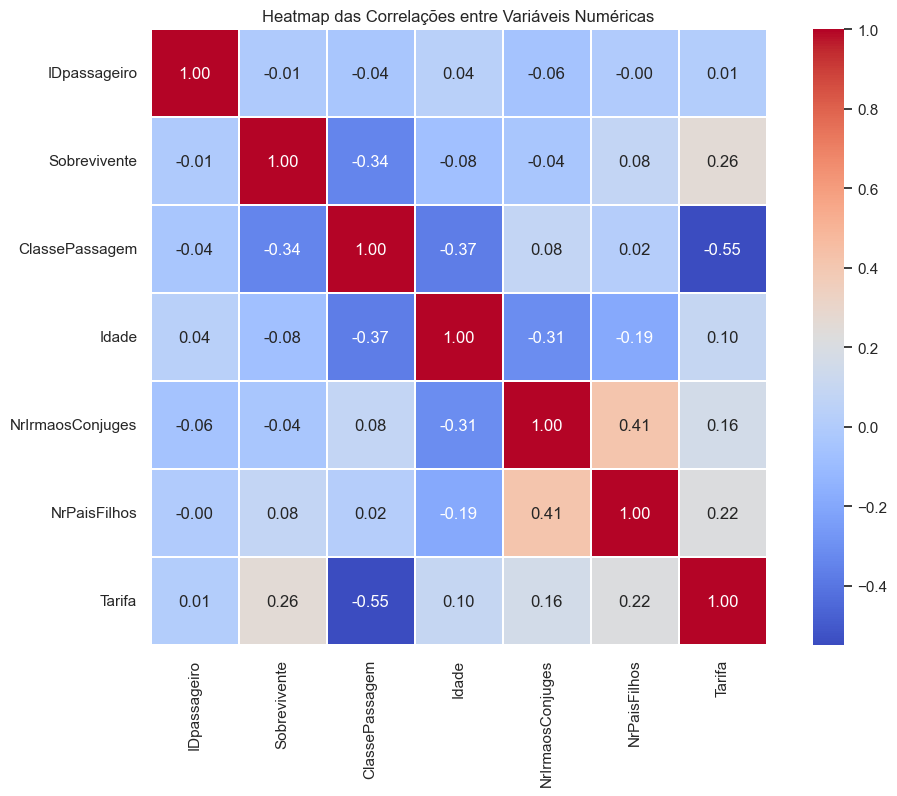

In [32]:
# Filtrando apenas as colunas numéricas
numeric_cols = titanic_df.select_dtypes(include='number')

# Calculando a correlação das variáveis numéricas
correlation_matrix = numeric_cols.corr()

# Configurando o tamanho da figura
plt.figure(figsize=(12, 8))

# Plotando o heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

# Configurando o título do gráfico
plt.title('Heatmap das Correlações entre Variáveis Numéricas')

# Exibindo o gráfico
plt.show()

### 3.8 Gráfico de dispersão 3D
- Para visualizar a relação entre a idade dos passageiros, a tarifa que pagaram e a classe da passagem no Titanic

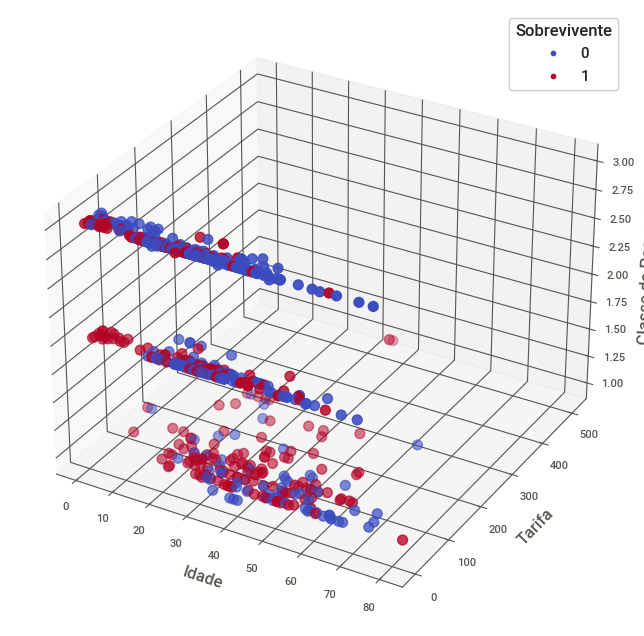

In [36]:
# Aqui, usaremos as colunas 'Idade', 'Tarifa' e 'ClassePassagem'
if {'Idade', 'Tarifa', 'ClassePassagem'}.issubset(titanic_df.columns):

    # Criação do gráfico de dispersão 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotando os dados
    sc = ax.scatter(titanic_df['Idade'], titanic_df['Tarifa'], titanic_df['ClassePassagem'], c=titanic_df['Sobrevivente'], cmap='coolwarm', s=50)

    # Adicionando labels aos eixos
    ax.set_xlabel('Idade')
    ax.set_ylabel('Tarifa')
    ax.set_zlabel('Classe da Passagem')

    # Adicionando a legenda
    legend1 = ax.legend(*sc.legend_elements(), title="Sobrevivente")
    ax.add_artist(legend1)

    # Exibindo o gráfico
    plt.show()
else:
    print("Colunas necessárias não encontradas no DataFrame.")

### 3.9 Analisando a estatistica descritiva
- Através da função ```df.describe()```. 
- Para isso, é só passar no argumento a letra "O"  ```include=['O']```.

In [34]:
titanic_df.describe(include=['O'])

,Nome,Genero,NrTicket,Cabine,PortoEmbarque
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Olhando esses dados a gente observa que:
* Os valores para ```Nome``` são únicos, um para cada pessoa;
* Não há *missing values* para ```Nome``` e ```Genero```;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton.

# 4. Gerando Report Sweetviz

In [35]:
# cria o reporte e chama de my_report
my_report = sv.analyze(titanic_df)

# Visualizar o relatório
my_report.show_html('titanic_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report titanic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
